In [1]:
#Importing the relevant libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 



In [2]:
#reading the train datset
hackathon_ = pd.read_csv("Train_hackathon.csv")
hackathon_.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
5,17388,495,3247,5,2011-11-27 12:52:00,1.65,15351.0,35
6,18494,165,3377,1,2011-12-08 20:01:00,1.25,12748.0,35
7,17109,2597,3435,1,2011-11-23 12:40:00,1.25,16255.0,35
8,17143,1945,2352,1,2011-11-23 14:07:00,5.75,17841.0,35
9,8422,3311,2502,6,2011-06-22 10:11:00,2.95,13849.0,35


In [3]:
#storing the copy of dataset in another dataframe
hackathon_train=hackathon_
hackathon_train.shape

(284780, 8)

In [4]:
#reading the test datset
hackathon_test_ = pd.read_csv("Test_hackathon.csv")
hackathon_test_.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35
5,8348,1817,697,48,2011-06-20 13:27:00,12432.0,24
6,17034,262,3147,18,2011-11-22 16:26:00,13985.0,35
7,3701,1323,2000,7,2011-03-08 17:23:00,14507.0,35
8,16983,2327,1121,6,2011-11-22 12:52:00,15150.0,35
9,14396,2216,1912,4,2011-10-20 13:24:00,14911.0,10


In [5]:
#storing the copy of the test dataset in another dataframe
hackathon_test=hackathon_test_
hackathon_test.shape

(122049, 7)

# Some insights and Assumptions:

## Attribute Description:
#### Invoice No - Invoice ID, encoded as Label
#### StockCode - Unique code per stock, encoded as Label
#### Description - The Description, encoded as Label
#### Quantity - Quantity purchased
#### InvoiceDate - Date of purchase
#### UnitPrice - The target value, price of every product
#### CustomerID - Unique Identifier for every Customer
#### Country - Country of sales, encoded as Label

#### Unit price is not dependant upon Invoice no. , Stock code, Customer id , and country code
#### Unit price is dependant upon Description and quantity
#### Description is a categorical variable 
#### Quantity is an integer variable and can not be negetive
#### Any value of quantity greater than 12000 is treated as an utlier in the train dataset and is removed

In [6]:
#Convering all the negative values of quantities into positive values

hackathon_test["Quantity"] = np.where(hackathon_test["Quantity"]<0,hackathon_test["Quantity"]*-1,hackathon_test["Quantity"])
hackathon_test["Quantity"].value_counts()

1       23224
12      18120
2       17703
6       11457
4        9718
        ...  
2100        1
88          1
1944        1
89          1
468         1
Name: Quantity, Length: 203, dtype: int64

In [7]:
#Repeating the same step in the test datset
hackathon_train["Quantity"] = np.where(hackathon_train["Quantity"]<0,hackathon_train["Quantity"]*-1,hackathon_train["Quantity"])
hackathon_train["Quantity"].value_counts()

1       53938
12      42433
2       41629
6       26699
4       22920
        ...  
2160        1
1900        1
98          1
1120        1
860         1
Name: Quantity, Length: 270, dtype: int64

In [9]:
#Removing the outliers

hackathon_train.drop(hackathon_train[hackathon_train.Quantity >= 12000].index, inplace=True)
hackathon_train.shape

(284775, 8)

In [11]:
#Dropping the Irrelevant columns

hackathon_train.drop(["InvoiceNo","StockCode","InvoiceDate","CustomerID","Country"],axis=1, inplace=True)
hackathon_test.drop(["InvoiceNo","StockCode","InvoiceDate","CustomerID","Country"],axis=1, inplace=True)

In [14]:
#concating the Description columns from the test and train dataset for binary encoding

hackathon=pd.concat([hackathon_train.drop(["UnitPrice","Quantity"],axis=1),hackathon_test.drop(["Quantity"],axis=1)],axis=0)
hackathon.shape

(406824, 1)

In [15]:
print(hackathon_train.columns)
print(hackathon_test.columns)
print(hackathon.columns)


Index(['Description', 'Quantity', 'UnitPrice'], dtype='object')
Index(['Description', 'Quantity'], dtype='object')
Index(['Description'], dtype='object')


In [16]:
#conveting the integer format into string format for binary encoding 
hackathon['Description'] = hackathon['Description'].apply(str)

In [17]:
hackathon.shape

(406824, 1)

In [19]:
#Importing the library for encoding
import category_encoders as ce

In [20]:
encoder= ce.BinaryEncoder(cols=['Description'],return_df=True)

In [21]:
hackathon_encoded=encoder.fit_transform(hackathon) 
hackathon_encoded

,Description_0,Description_1,Description_2,Description_3,Description_4,Description_5,Description_6,Description_7,Description_8,Description_9,Description_10,Description_11,Description_12
0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122044,0,1,0,1,1,0,0,1,0,1,0,1,0
122045,0,0,0,0,1,0,0,0,0,1,0,0,0
122046,0,0,0,0,0,1,1,0,0,0,0,1,0
122047,0,0,1,1,1,1,0,1,0,1,0,1,0


In [22]:
#Splitting the hackathon dataframe into train and test datasets

train=pd.concat([hackathon_train.drop(["Description"],axis=1),hackathon_encoded.iloc[:284775,:]],axis=1)
test=pd.concat([hackathon_test.drop(["Description"],axis=1),hackathon_encoded.iloc[284775:,:]],axis=1)
print(train.shape)
print(test.shape)

(284775, 15)
(122049, 14)


In [23]:
#checking fr skewness
train.skew(axis = 0, skipna = True)

Quantity           28.357110
UnitPrice         438.336669
Description_0       0.000000
Description_1       2.564396
Description_2       0.923792
Description_3       0.488082
Description_4       0.271199
Description_5       0.156269
Description_6       0.013520
Description_7      -0.006482
Description_8      -0.016512
Description_9      -0.011076
Description_10      0.072435
Description_11      0.019602
Description_12     -0.034524
dtype: float64

In [24]:
#Definig the dependant and independant variable on the train datset

X=train.drop(["UnitPrice"],axis=1)
#X=scaler.fit_transform(X) # scaling and removing skewness
Y=np.asarray(train["UnitPrice"])
Y=np.log1p(Y) # removing skewness

In [25]:
#checking for any nan values
np.isnan(np.min(Y))

False

In [26]:
#Splitting the X and Y int test and train sest

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

Train set: (227820, 14) (227820,)
Test set: (56955, 14) (56955,)


In [27]:
#Importing the relevant libraries for spot check algorithms

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [28]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('GBM', GradientBoostingRegressor()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='max_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -7.117300 (1.047674)
LASSO: -6.927474 (1.067642)
EN: -6.927474 (1.067642)
KNN: -4.650970 (0.762431)
CART: -4.786454 (1.078912)
GBM: -6.657916 (1.065460)


In [49]:
# Using K_Nearest neighbour regressor because it has the least error value
# running for different K values to know which yields the max accuracy.
from sklearn.metrics import mean_squared_error
import math
score = []
error_rate=[]
for k in range(1,20):    
    clf = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    clf.fit(X_train, Y_train)
    score.append(clf.score(X_test, Y_test))
    pred=clf.predict(X_test)
    rmse=np.sqrt(mean_squared_error(Y_test, pred))
    error_rate.append(rmse)

Text(0, 0.5, 'Error Rate')

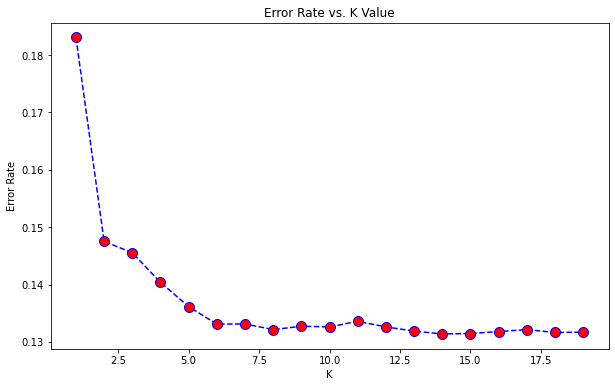

In [50]:
#Plotting Error VS K

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color="blue", linestyle="dashed", marker="o",markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

Text(0, 0.5, 'Accuracy')

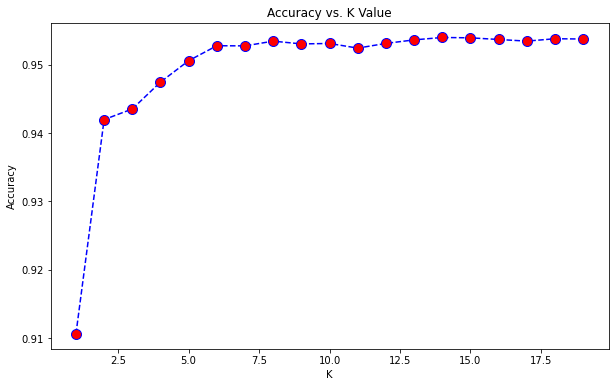

In [51]:
#Plotting Accuracy vs K

plt.figure(figsize=(10,6))
plt.plot(range(1,20),score,color="blue", linestyle="dashed", marker="o",markerfacecolor="red", markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")

In [52]:
#understanding the best value of K
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 14, Max Accuracy = 95.3971611130392


In [53]:
# Defininf the independant variable for the test dataset
Xt=test
Xt=scaler.fit_transform(Xt)
X=scaler.fit_transform(X)

In [55]:
#Applying KNeighboursRegressor Algorithm with k=6 (elbow method)

clf = KNeighborsRegressor(n_neighbors = 6,  weights = 'distance', p=1)
clf.fit(X, Y)
print(clf.score(X, Y ))   
y_pred = clf.predict(Xt)

0.9645564467813801


In [60]:
#Taking the antilog of ouput because it was log transformed earlier
output = np.expm1(y_pred) #antilog

In [61]:
hackathon_test["output"]=output #storing the output in a dataframe

In [62]:
o2=hackathon_test["output"]

In [63]:
o2.shape

(122049,)

In [64]:
o2.to_csv('hackathon_predictions.csv') #Storing in a CSV file